In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import mediapipe as mp
import pandas as pd
plt.rcParams["figure.figsize"] = (20, 20)

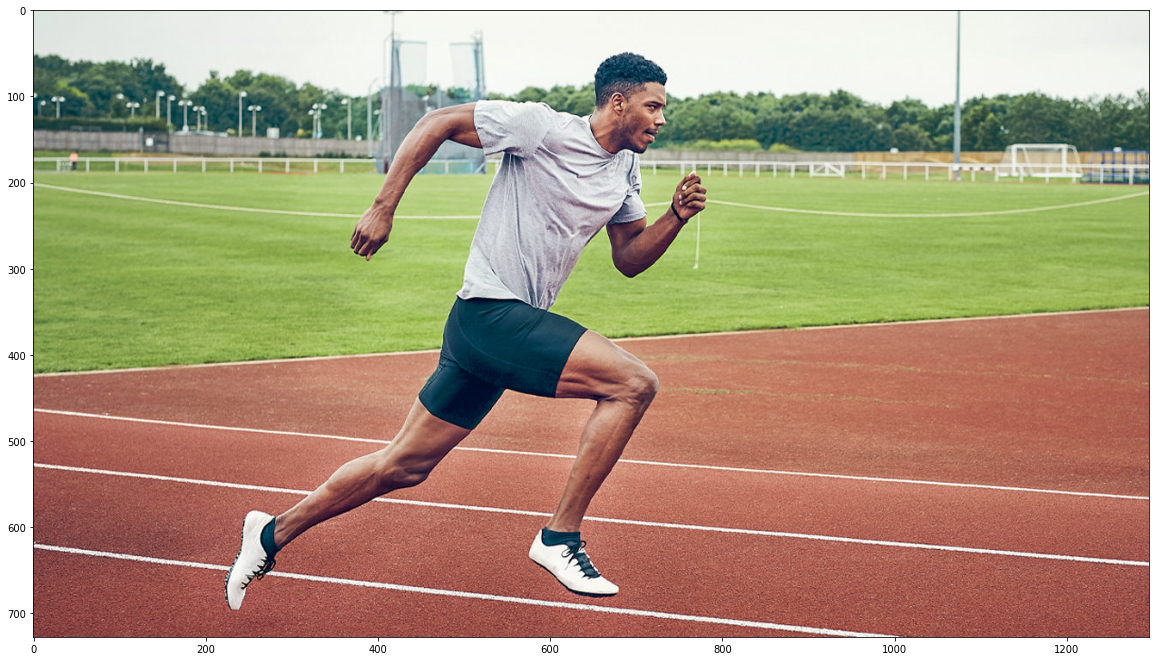

In [95]:
image = cv.imread('./inputs/input.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# fig = plt.figure(figsize=(100, 100))
plt.imshow(image)

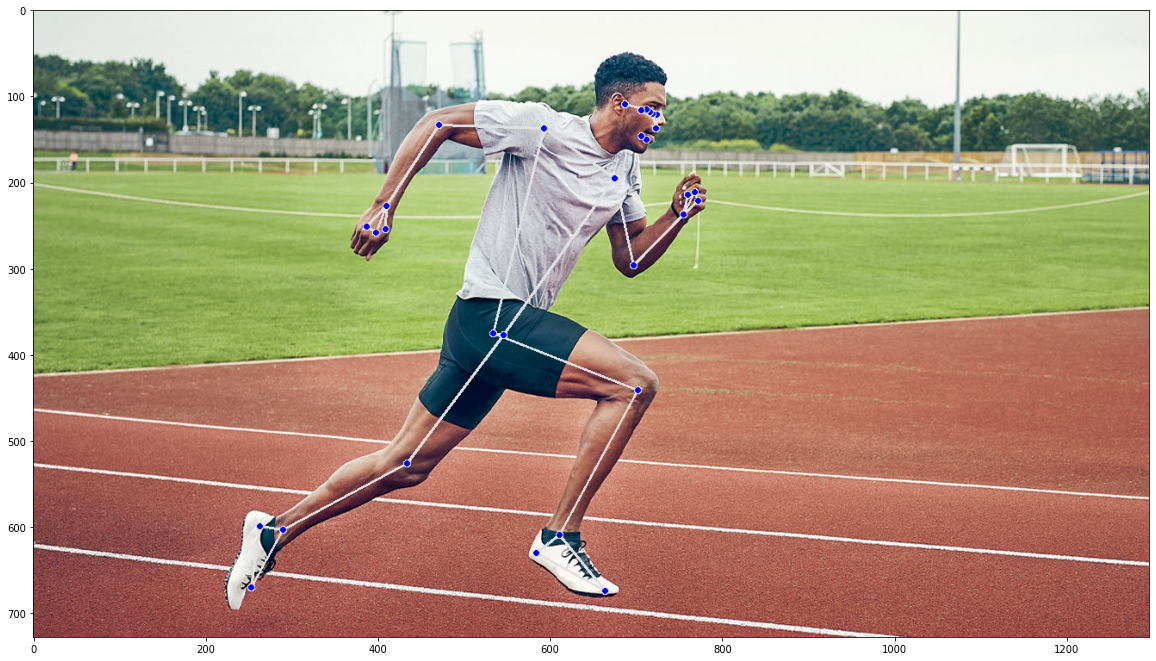

In [30]:
pose_sol = mp.solutions.pose
draw_utils = mp.solutions.drawing_utils
pose = pose_sol.Pose()

results = pose.process(image)
draw_utils.draw_landmarks(image, results.pose_landmarks, pose_sol.POSE_CONNECTIONS)
plt.imshow(image)

In [87]:
# converts to image coordinates
landmark_names = ["nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer", "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_pinky", "right_pinky", "left_index", "right_index", "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle", "left_heel", "right_heel", "left_foot_index", "right_foot_index"]
landmarks = {}
for index, name in enumerate(landmark_names):
    landmarks[name] = {"name": name, 'id' : index}

for id, landmark in enumerate(results.pose_landmarks.landmark):
    height, width, channel = image.shape
    cx, cy = int(landmark.x * width), int(landmark.y * height)
    landmarks[landmark_names[id]]["image_coords"] = (cx, cy)

for id, landmark in enumerate(results.pose_world_landmarks.landmark):
    x, y, z = landmark.x, landmark.y, landmark.z
    landmarks[landmark_names[id]]["world_coords"] = (x, y, z)

landmarks_df = pd.DataFrame(landmarks).T
landmarks_df.head()


name id image_coords  \
nose                        nose  0   (723, 137)   
left_eye_inner    left_eye_inner  1   (725, 122)   
left_eye                left_eye  2   (725, 121)   
left_eye_outer    left_eye_outer  3   (724, 121)   
right_eye_inner  right_eye_inner  4   (719, 120)   

                                                      world_coords  
nose             (0.39167237281799316, -0.444375216960907, -0.0...  
left_eye_inner   (0.3937892019748688, -0.49007827043533325, -0....  
left_eye         (0.3941047489643097, -0.49005553126335144, -0....  
left_eye_outer   (0.3941686749458313, -0.4910150170326233, -0.0...  
right_eye_inner  (0.37828564643859863, -0.4921993315219879, -0....

In [94]:
for tuple in pose_sol.POSE_CONNECTIONS:
    first_node = tuple[0]
    second_node = tuple[1]
    first_node = landmarks_df.loc[landmarks_df['id'] == first_node]
    second_node = landmarks_df.loc[landmarks_df['id'] == second_node]
    print(first_node.name, second_node.name)

    break

left_wrist    left_wrist
Name: name, dtype: object left_thumb    left_thumb
Name: name, dtype: object


In [53]:
pose_sol.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

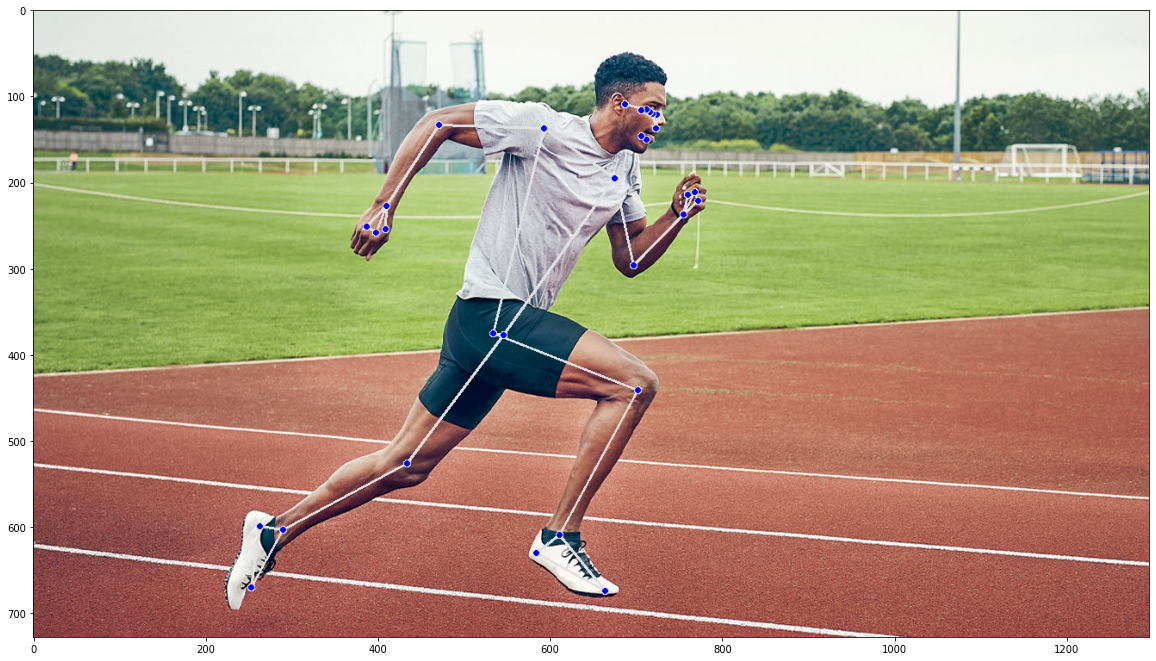

In [31]:
plt.imshow(image)